# Basis of Artificial Neural Network

### input neuron=1, hidden layer 1 =6, hidden layer 2 = 10, hidden layer 3 =6, output neuron =1

In [1]:
import torch
import torch.nn as nn  # torch module for ANN
import torch.optim as optim  # torch module for optimizer algorithms
import torch.nn.init as init  # torch module for initialize values

In [3]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2 + 3)
y_noise = y + noise

# build model, loss_func, optimizer
model = nn.Sequential(
        nn.Linear(1, 6),
        nn.ReLU(),
        nn.Linear(6, 10),
        nn.ReLU(),
        nn.Linear(10, 6),
        nn.ReLU(),
        nn.Linear(6, 1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

# training
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

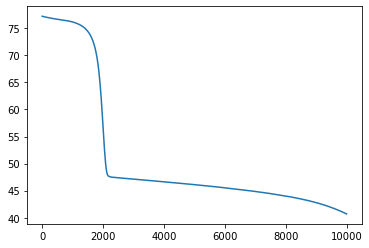

In [5]:
#plotting loss
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()